In [127]:
import numpy as np
import matplotlib.pyplot as plt
from turtle import speed

In [128]:
fps = 20
dt = 1/fps

In [129]:


class FallPhysics():

    def __init__(self, gravitation=-9.81, speed_y_start=0, pos_y_start=1000, pos_y_collision=0) -> None:
        self.gravitation = gravitation # m/s2
        self.speed_y = speed_y_start # m/s
        self.pos_y = pos_y_start # m
        self.pos_y_collision = pos_y_collision # m

    def update_speed_y(self, dt):
        self.speed_y =  self.gravitation * dt + self.speed_y
        return

    def update_pos_y(self, dt):
        self.update_speed_y(dt)
        self.pos_y = self.gravitation/2*np.power(dt,2) + self.speed_y * dt + self.pos_y # m
        return self.pos_y

In [130]:
discrete_time = np.arange(0,100)
discrete_time

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

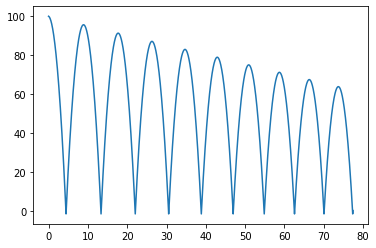

In [132]:
pos_y_history = []
counter = 0
collision = False
coefficient_of_restitution = 1

ball = FallPhysics(gravitation=-9.81, speed_y_start=0, pos_y_start=100, pos_y_collision=0)


while(counter<10):
    if collision:
        ball.speed_y = -ball.speed_y*coefficient_of_restitution

        while(collision):
            pos_y_now = ball.update_pos_y(dt)
            pos_y_history.append(pos_y_now)
            #print(pos_y_now)
            collision = pos_y_now <= ball.pos_y_collision

            if ball.speed_y < 0: # ball has not enough energy cross border
                break

        counter += 1
        collision = False

    else:
        pos_y_now = ball.update_pos_y(dt)
        collision = pos_y_now <= ball.pos_y_collision
        pos_y_history.append(pos_y_now)

td_acc_history = np.arange(0, len(pos_y_history))*dt

plt.plot(td_acc_history, pos_y_history)